In [66]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.special import sph_harm
import healpy as hp
from matplotlib import animation, rc

# Spherical Harmonics ($Y_l^m$'s)
If we are dealing with a central potential ($V(\mathbf{r})=V(r)$), we use separation of variables to simplify the Time Independent Schrödinger Equation.

$$\psi(r,\theta,\phi)=R(r)Y(\theta,\phi)$$

$$-\frac{\hbar^2}{2m}\left[\frac{Y}{r^2}\frac{d}{dr}\left(r^2\frac{dR}{dr}\right)
+\frac{R}{r^2\sin{\theta}}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial Y}{\partial\theta}\right)+\frac{R}{r^2\sin^2\theta}\frac{\partial^2Y}{\partial\phi^2}\right]+VRY=ERY$$

And the angular part must independently satisfy

$$\frac{1}{Y}\left\{\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial Y}{\partial\theta}\right)+
\frac{1}{\sin^2\theta}\frac{\partial^2Y}{\partial\phi^2}
\right\}=-l(l+1).$$

This doesn't depend at all on the potential, and can be solved once and for all. The strategy is to further separate our variables, $Y(\theta,phi)=\Theta(\theta)\Phi(\phi)$. I'll refer you to Griffiths for the details, and simply recite the result here. The solutions are

$$Y_l^m(\theta,\phi)=\sqrt{\frac{(2l+1)}{4\pi}\frac{(l-m)!}{(l+m)!}}
e^{im\phi}P_l^m(\cos{\theta}),$$

where $l=0,1,2...$, $m=-l,...,l$, and $P_l^m(x)$ are the associated Legendre polynomials.

Ok, so we have a nasty mathematical equation for the solutions. Let's let the computer do the work so we can just look at the answers.

## Visualizing the $Y_l^m$'s

The $Y_l^m$'s are functions of the polar angle, $\theta$ (running 0 at the north pole to $\pi$ at the south pole), and the azimuthal angle, $\phi$ (running 0 to $2\pi$ like the longitudinal angle). In addition, they are complex. So visualizing can be a little tricky.

Let's start with a simple way to look at them, then I'll show you a better way. For the first way, we'll just make two lists of $\theta$ and $\phi$ coordinates, and fill in a 2D array with the values of $Y_l^m(\theta,\phi)$.

In [3]:
# Create coordinate arrays
theta = np.linspace(0, np.pi, 100).reshape(-1, 1)
phi = np.linspace(0, 2*np.pi, 200).reshape(1, -1)

<IPython.core.display.Javascript object>


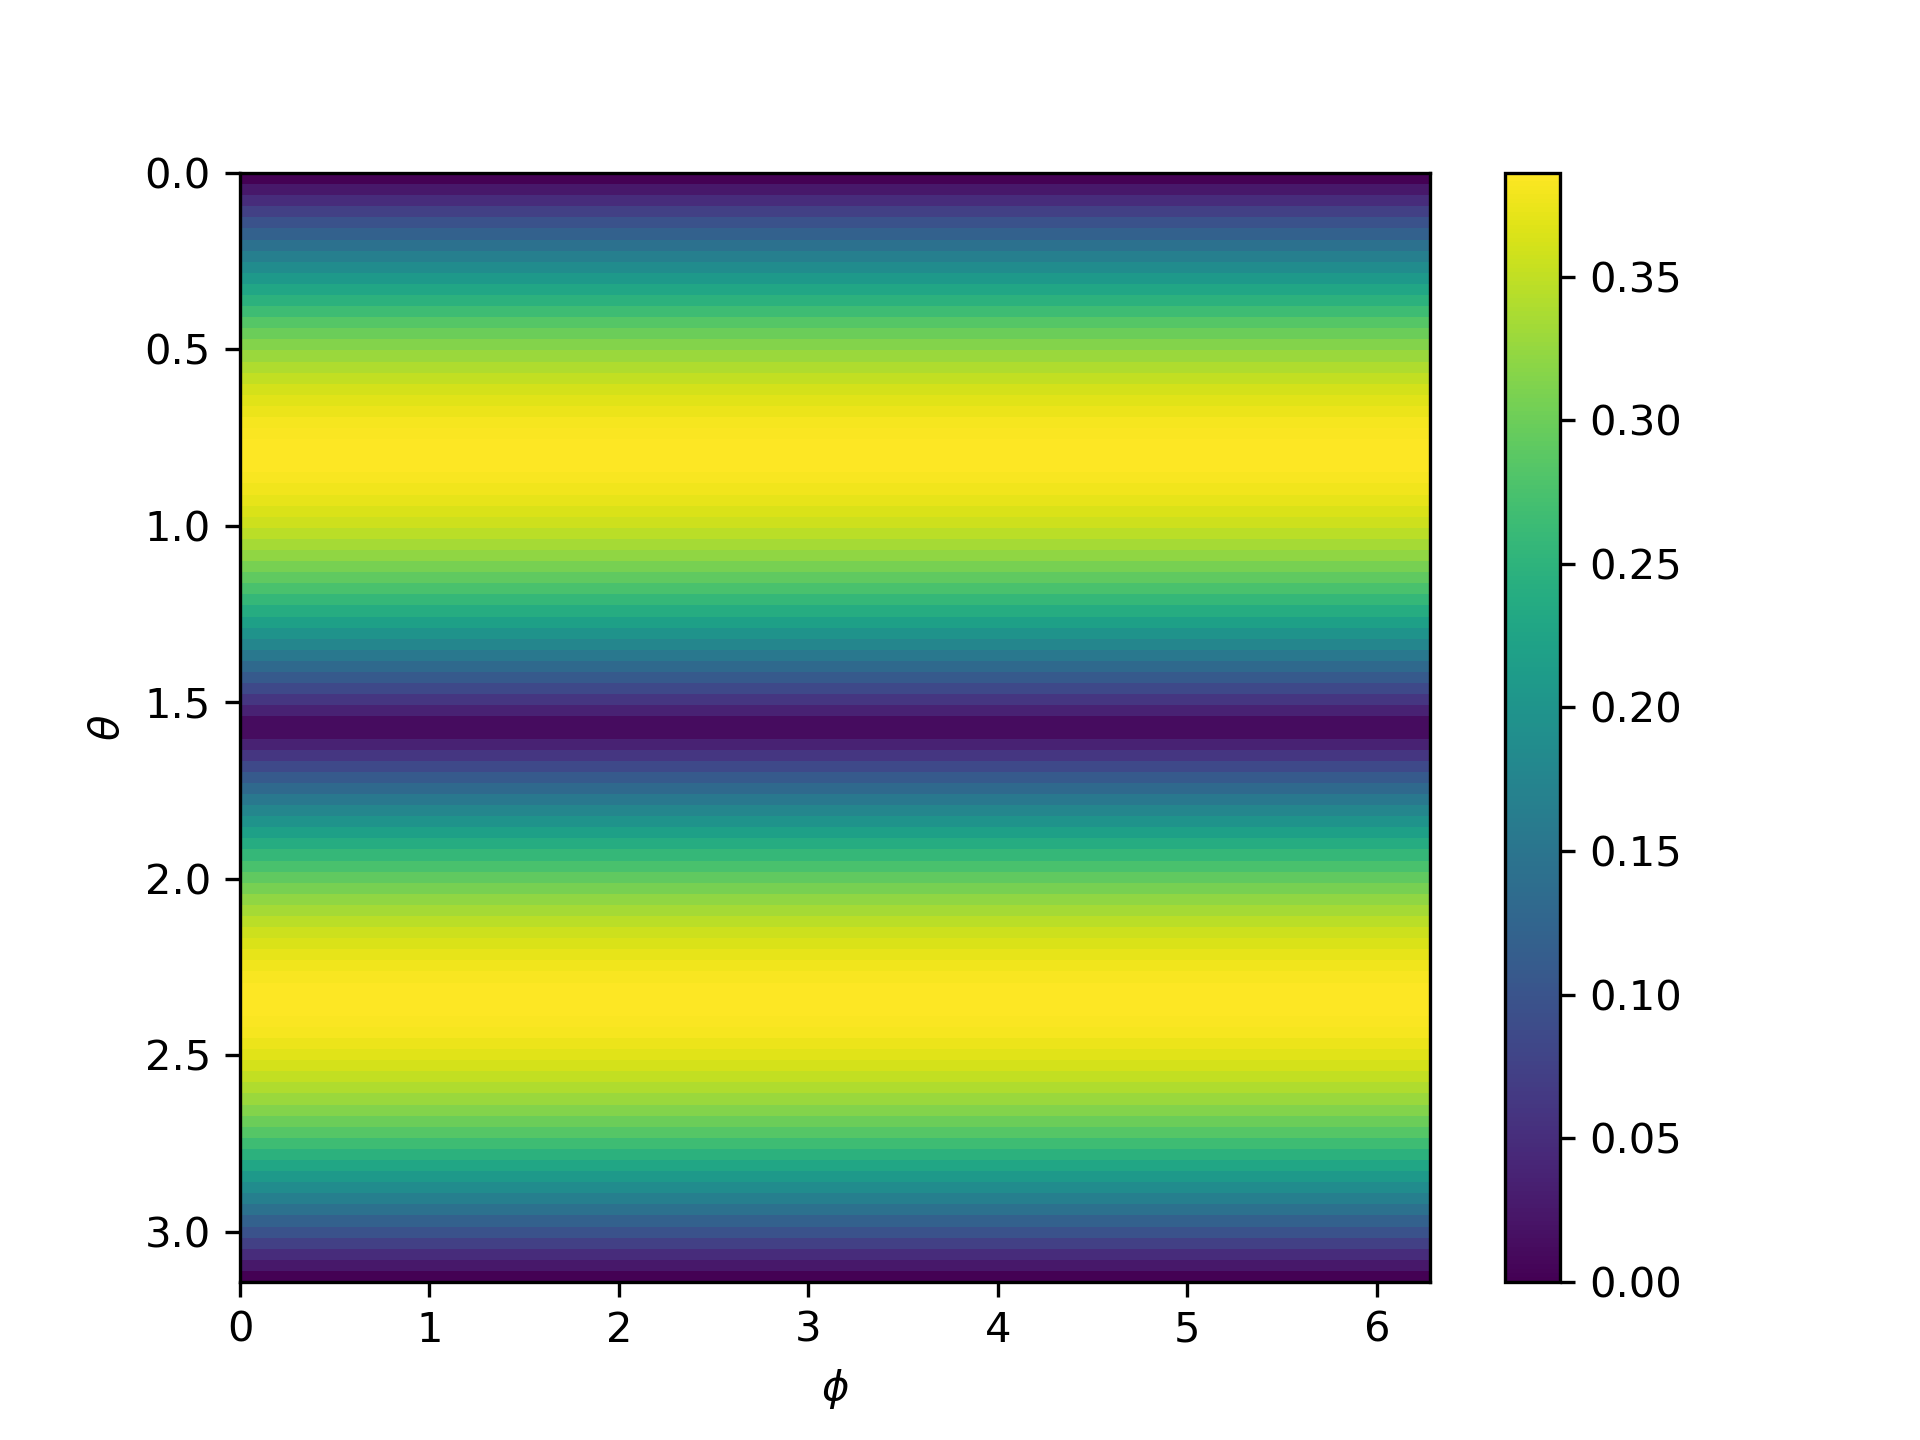

Text(0, 0.5, '$\\theta$')

In [58]:
# Try different l,m combinations here
l = 2
m = 1

Ylm = sph_harm(m, l, phi, theta)

plt.figure()
plt.imshow(np.abs(Ylm), aspect='auto', extent=[0, 2*np.pi, np.pi, 0])
plt.colorbar()
plt.xlabel('$\phi$')
plt.ylabel(r'$\theta$')

This square grid can be hard to vizualize how it maps to a sphere. Also, even though each grid point is the same $d\theta d\phi$, the pixels are different sizes due to the $\sin\theta$ term that captures smaller pixels near the poles.

Let's try something better - using healpix. Healpix is a framework for generating equal-area pixels on a sphere. It also provides some useful plotting projections.

In [4]:
nside = 512
theta, phi = hp.pix2ang(nside, np.arange(12 * nside**2))

<IPython.core.display.Javascript object>


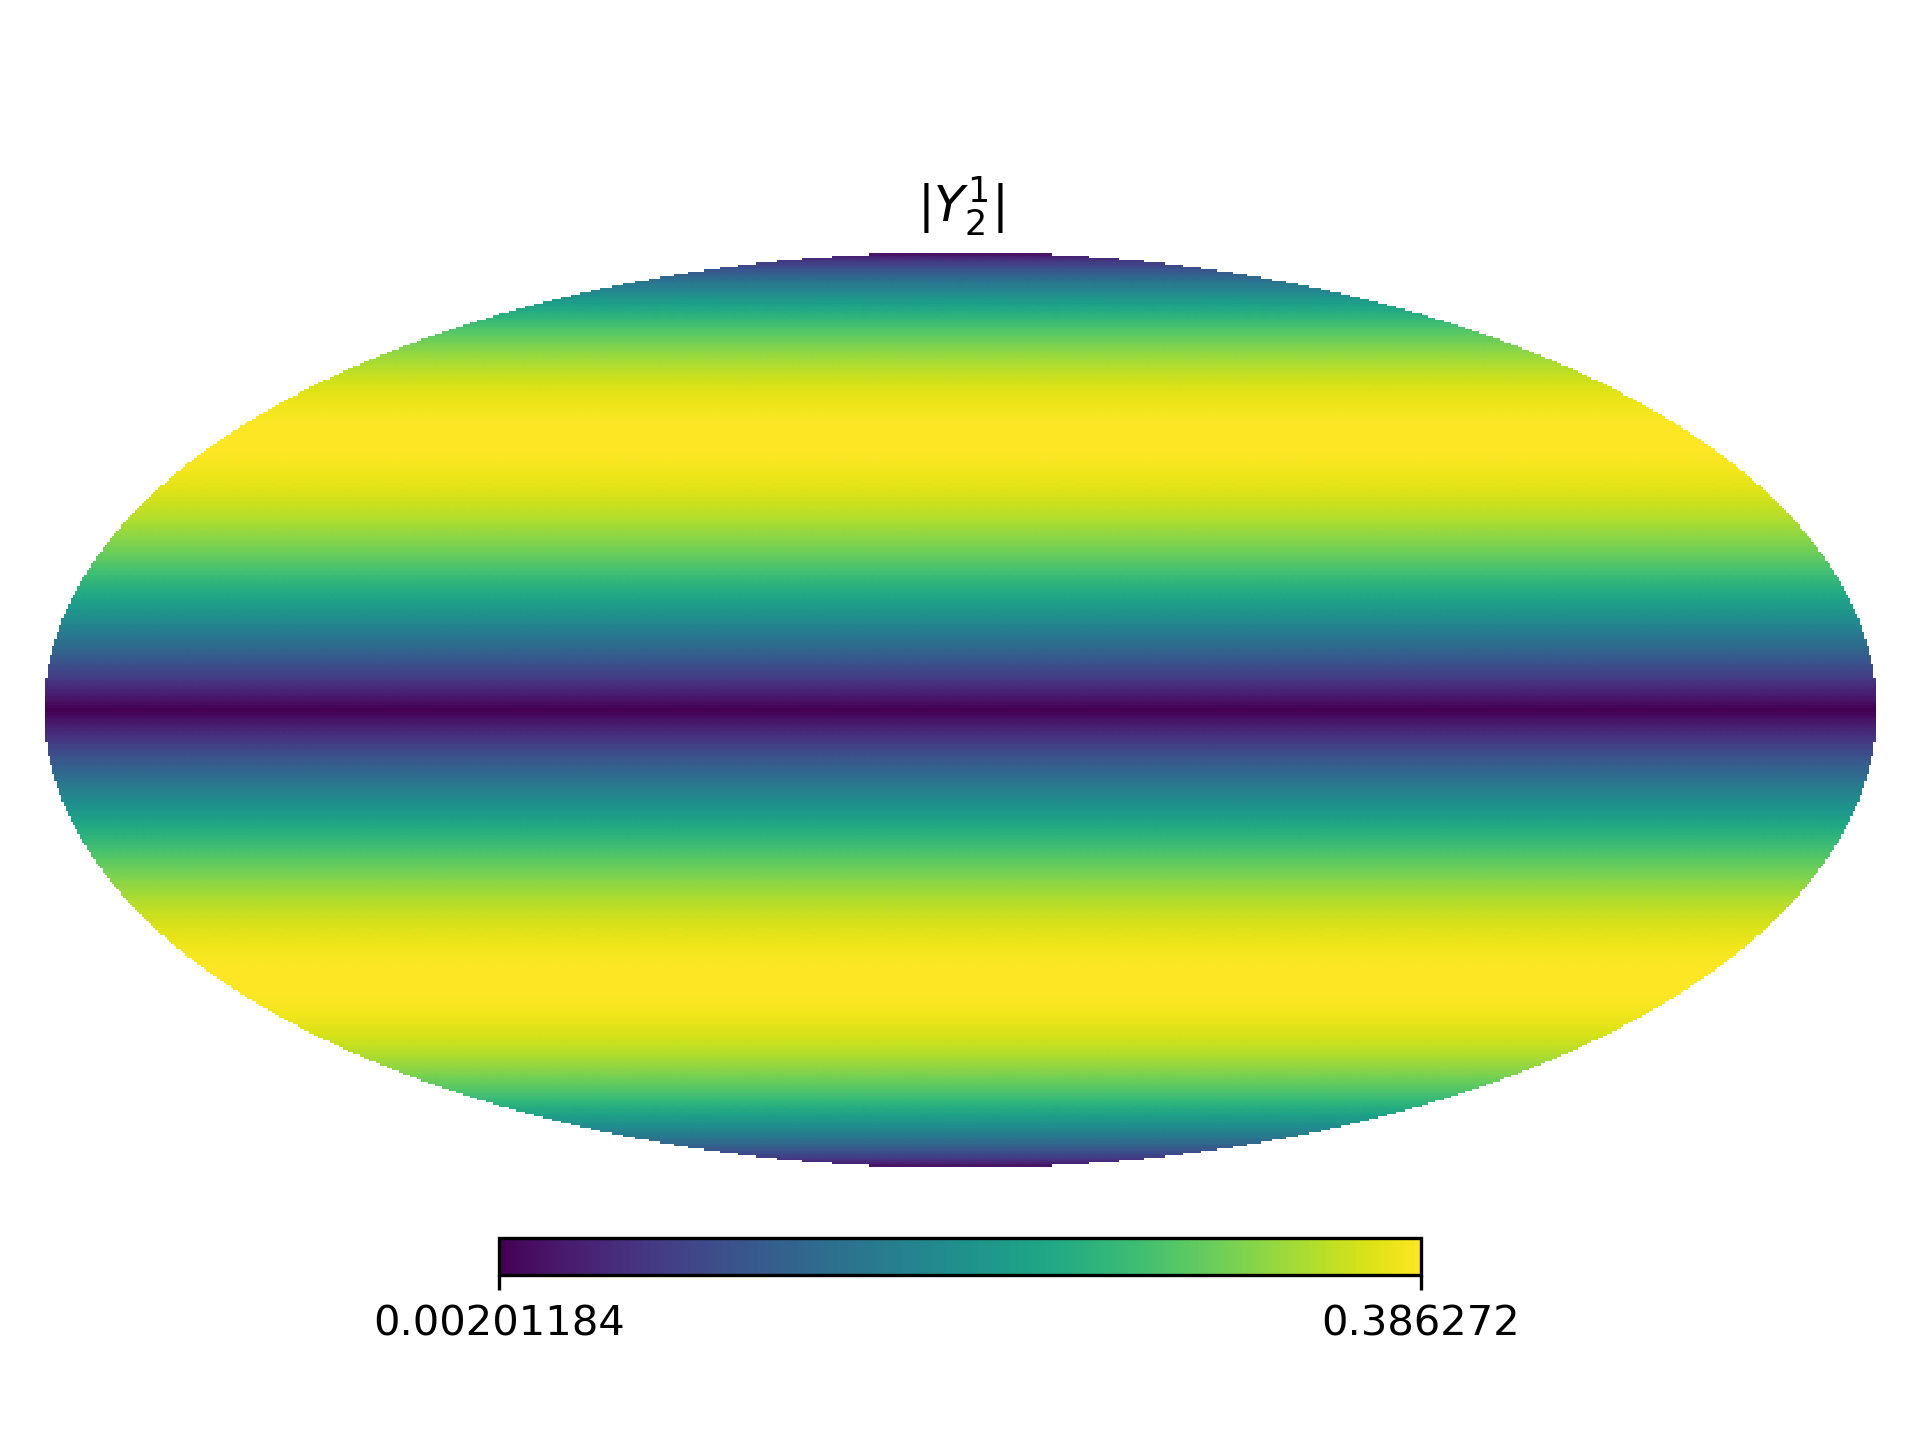

In [67]:
l = 2
m = 1

Ylm = sph_harm(m, l, phi, theta)

cf = plt.figure()
hp.mollview(np.abs(Ylm), fig=cf, title=f'$|Y_{l}^{m}|$')

To interpret the image above, think about unrolling a globe. Here's an example from Wikimedia showing the earth in the same projection. Remember, $\theta$ runs from north pole to south, and $\phi$ moves left-to-right like longitude.
![Globe](https://upload.wikimedia.org/wikipedia/commons/9/9e/Mollweide_projection_SW.jpg)

## $\phi$-dependence?

If you've played around with the $l$'s and $m$'s, you may have noticed that up to now our $Y_l^m$ plots are constant in $\phi$. Where is the $\phi$ dependence? It's all in $\Phi(\phi)=e^{im\phi}$. This function has constant amplitude, so it's no wonder it hasn't shown up in our amplitude plots above. But to see its affect, we can plot the real/imaginary parts.

<IPython.core.display.Javascript object>


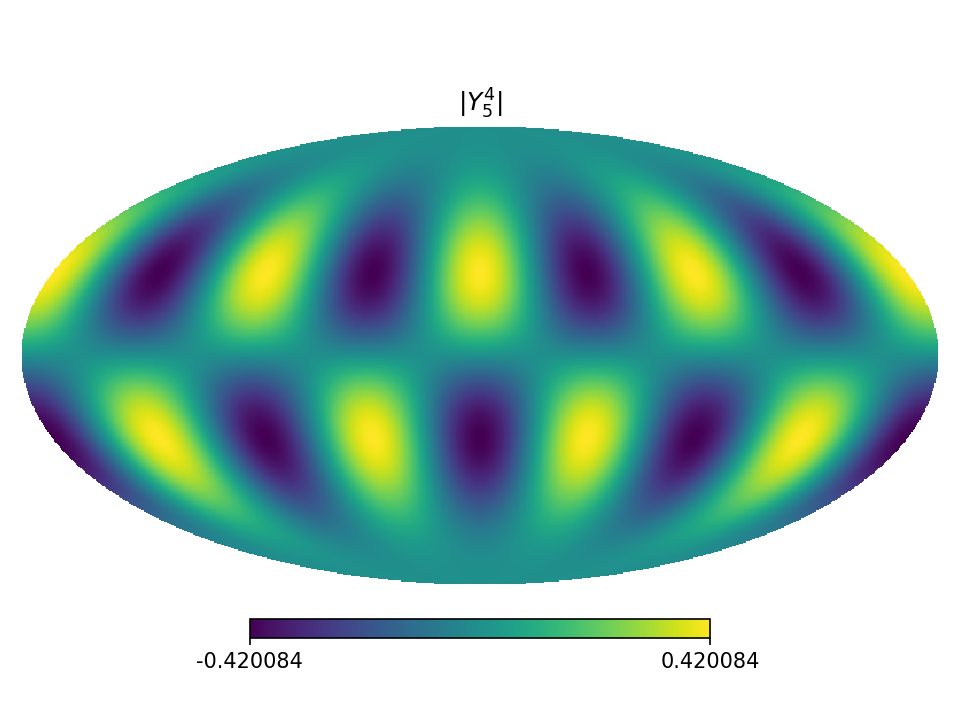

In [76]:
l = 5
m = 4

Ylm = sph_harm(m, l, phi, theta)

cf = plt.figure()
hp.mollview(np.real(Ylm), fig=cf, title=f'$|Y_{l}^{m}|$')

## Orthogonality
Ok, so those are the spherical harmonics. It's fun to play around with them and see what they look like. But they should have two very important properties: they should be orthonormal, and complete. Let's test it out, starting with orthonormality. We should find:
$$\int Y_l^{m*}(\theta,\phi)Y_{l'}^{m'}(\theta,\phi) d\Omega = \delta_{ll'}\delta_{mm'}$$

### Integrating
Because we're working with numerical tools, we will perform a sum that approximates the integral. We simply need to multiply the functions together (with appropriate conjugation, of course).

$$\int Y_l^{m*}(\theta,\phi)Y_{l'}^{m'}(\theta,\phi) d\Omega
\approx \sum_i Y_l^{m*}(\theta_i,\phi_i)Y_{l'}^{m'}(\theta_i,\phi_i)\Delta\Omega$$

What's this $\Delta\Omega$ business? This is the differential area element. For the discrete sum, it's the area of each pixel (in units of steradians). This is one reason Healpix is so nice - all the pixels are the same size. And even better, `hp.nside2pixarea()` is a function that simply gives us the pixel area.

In [79]:
# Define to pairs of l's and m's
l1 = 1
m1 = 0
l2 = 2
m2 = -1

Ylm_1 = sph_harm(m1, l1, phi, theta)
Ylm_2 = sph_harm(m2, l2, phi, theta)

# Do the integral
domega = hp.nside2pixarea(nside)
integral = np.sum(np.conj(Ylm_1) * Ylm_2 * domega)
print(f'<{l1},{m1}|{l2},{m2}> = {integral}')

<1,0|2,-1> = (-5.383021434743167e-17+2.168404344971009e-18j)


You can try different $(l,m)$'s above, and you should see when they're not the same, you get a sum around $\sim10^{-17}$, and if they're the same you get $\sim1$. The answers aren't exactly 0 and 1 because this is a numerical exercise.
Let's try running a whole bunch of cases.

In [86]:
lmax = 5  # More l's, more sums to compute.
nstates = (1 + lmax)**2  # Total number of states given lmax
products = np.zeros((nstates, nstates))
domega = hp.nside2pixarea(nside)

# Now we need to loop over all pairs of lm's
# There's almost certainly a more efficient way to do this...
# As it is, this takes some time to run.
state1_ind = 0  # count state we're in
state2_ind = 0
for l1 in range(lmax + 1):
    print(l1)
    for m1 in range(-l1, l1 + 1):
        Ylm_1 = sph_harm(m1, l1, phi, theta)
        for l2 in range(lmax + 1):
            for m2 in range(-l2, l2 + 1):
                Ylm_2 = sph_harm(m2, l2, phi, theta)
                products[state1_ind, state2_ind] = np.sum(np.conj(Ylm_1) * Ylm_2 * domega).real
                state2_ind += 1
        state1_ind += 1
        state2_ind = 0

0
1
2
3
4
5


<IPython.core.display.Javascript object>


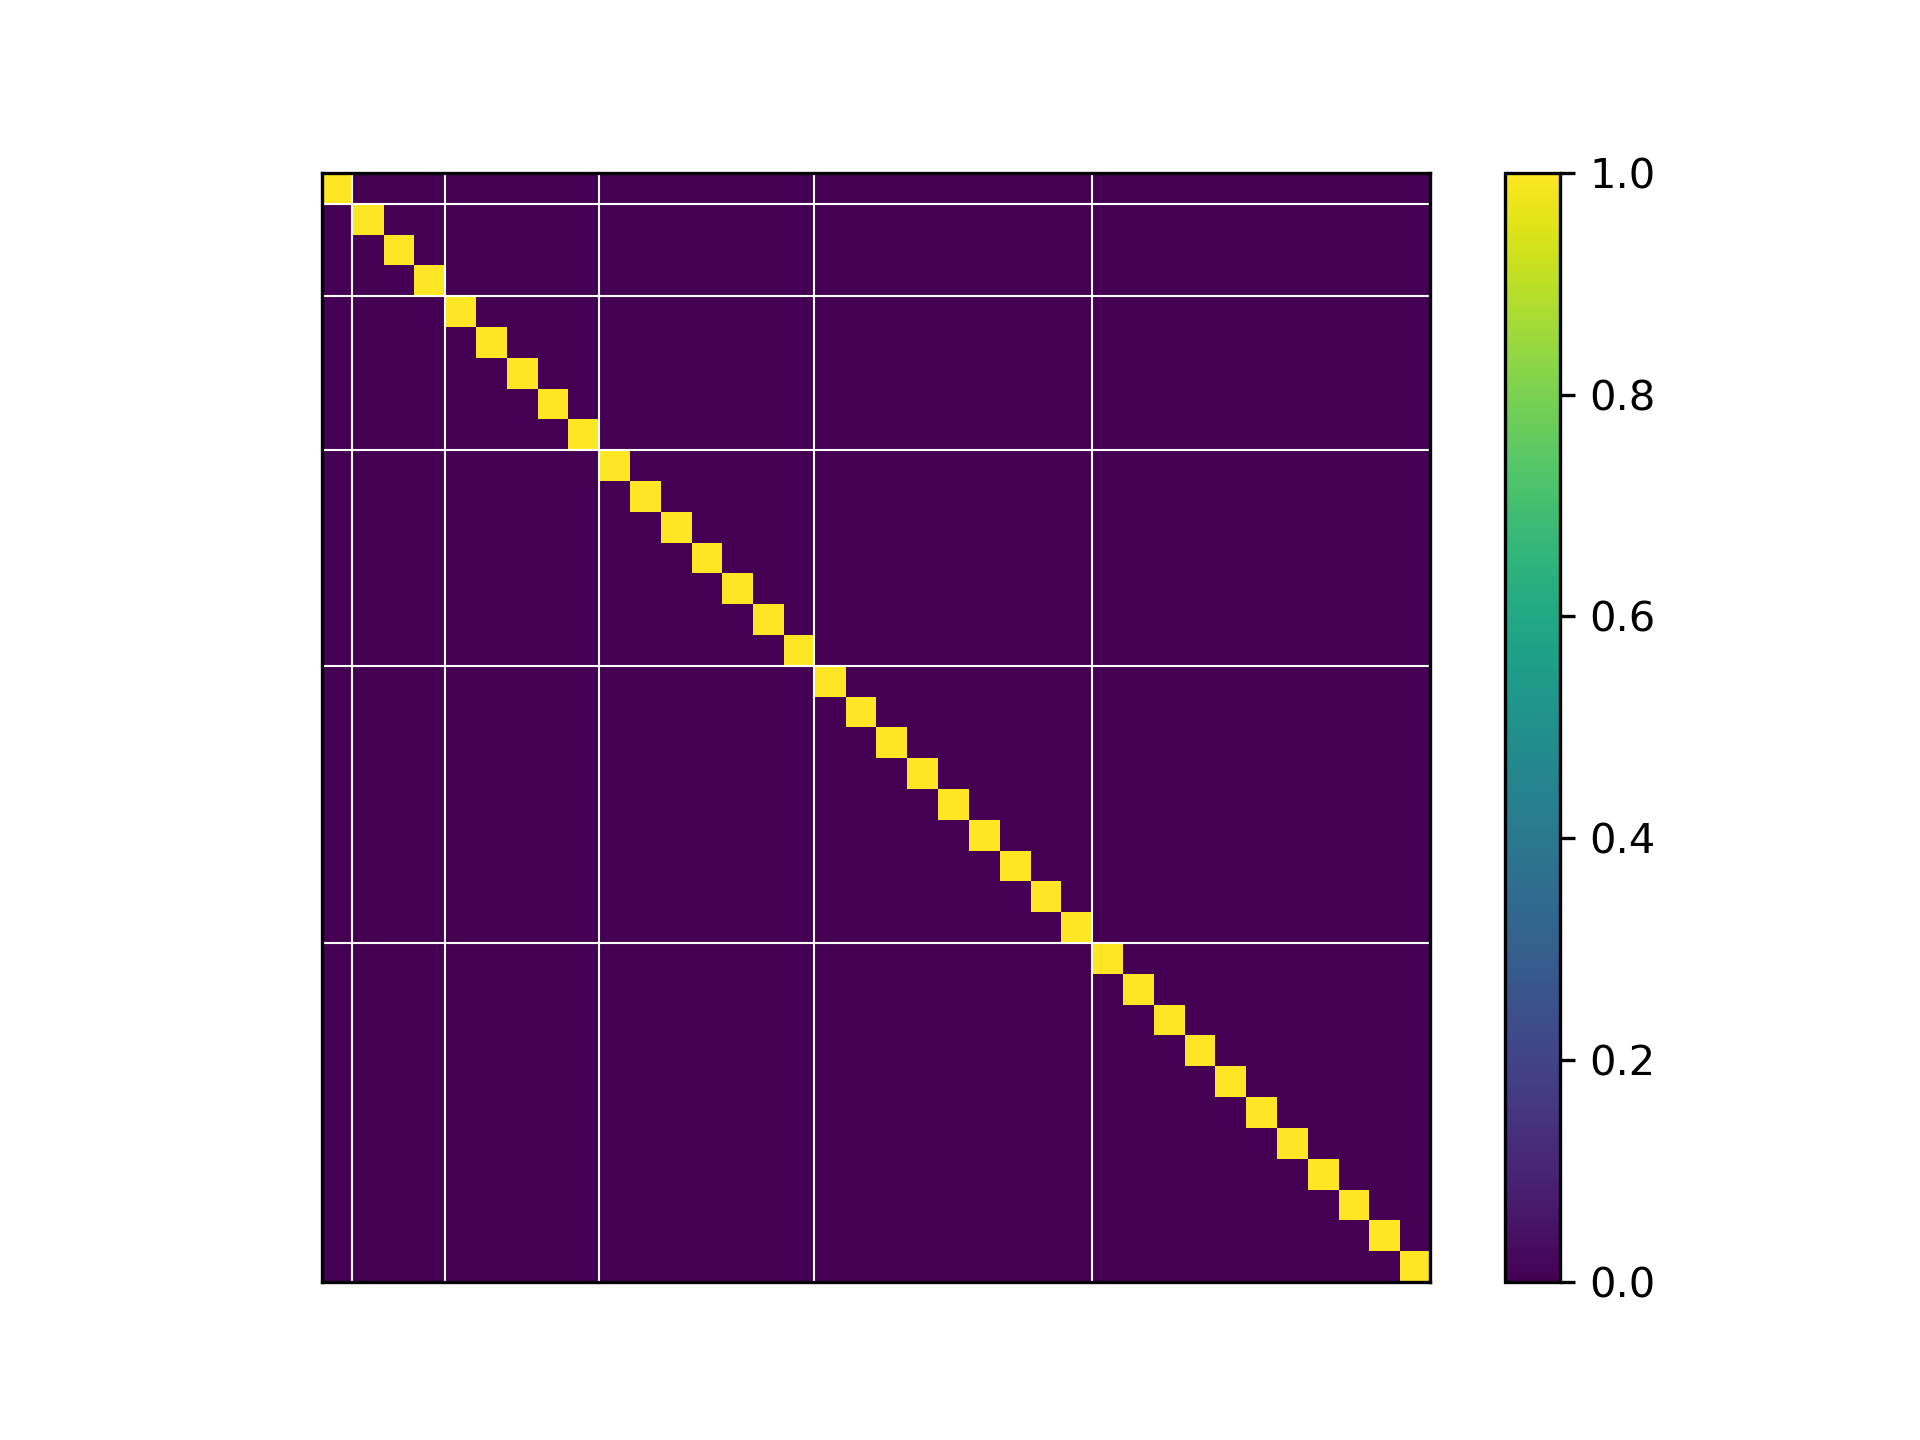

([], [])

In [94]:
plt.figure()
plt.imshow(products)
plt.colorbar()

for l in range(lmax):
    plt.axvline((l + 1)**2 - 0.5, lw=.5, c='w')
    plt.axhline((1 + l)**2 - .5, lw=.5, c='w')
    
plt.xticks([])
plt.yticks([])

In the plot above, the white lines are showing the different $l$'s. Within each box we run $m$ from $-l$ to $+l$ on each axis. The main thing to see is that our integral is 1 on the diagonal, and 0 off diagonal. Orthonormality!

## Completeness
Ok, now comes the fun part. If the spherical harmonics are complete, we should be able to represent any function on the surface of a sphere using them. Let's try it out with a map of the earth!

There's a bit of setup here, so bear with me.

The first bit of code is borrowed from [this notebook](https://nbviewer.org/gist/zonca/6187504), and the source image is from [here](https://github.com/matplotlib/basemap/blob/master/lib/mpl_toolkits/basemap_data/shadedrelief.jpg). I ran this commented code once myself, then committed the healpix data to git so we don't need to run it again in the future. I'm keeping the code here so it can be reproduced/modified if needed.

In [100]:
# from matplotlib.image import pil_to_array
# from PIL import Image
# grayscale_pil_image = Image.open("./shadedrelief.jpeg").convert("L")
# image_array = pil_to_array(grayscale_pil_image)

In [111]:
# theta_earth = np.linspace(0, np.pi, num=image_array.shape[0])[:, None]
# phi_earth = np.linspace(-np.pi, np.pi, num=image_array.shape[1])
# pix = hp.ang2pix(nside, theta_earth, phi_earth)
# earth_hp = np.zeros(hp.nside2npix(nside), dtype=np.double)
# earth_hp[pix] = image_array
# np.savetxt('./earth_hp.txt', earth_hp)

Now we can simply load in the saved file and run with it.

<IPython.core.display.Javascript object>


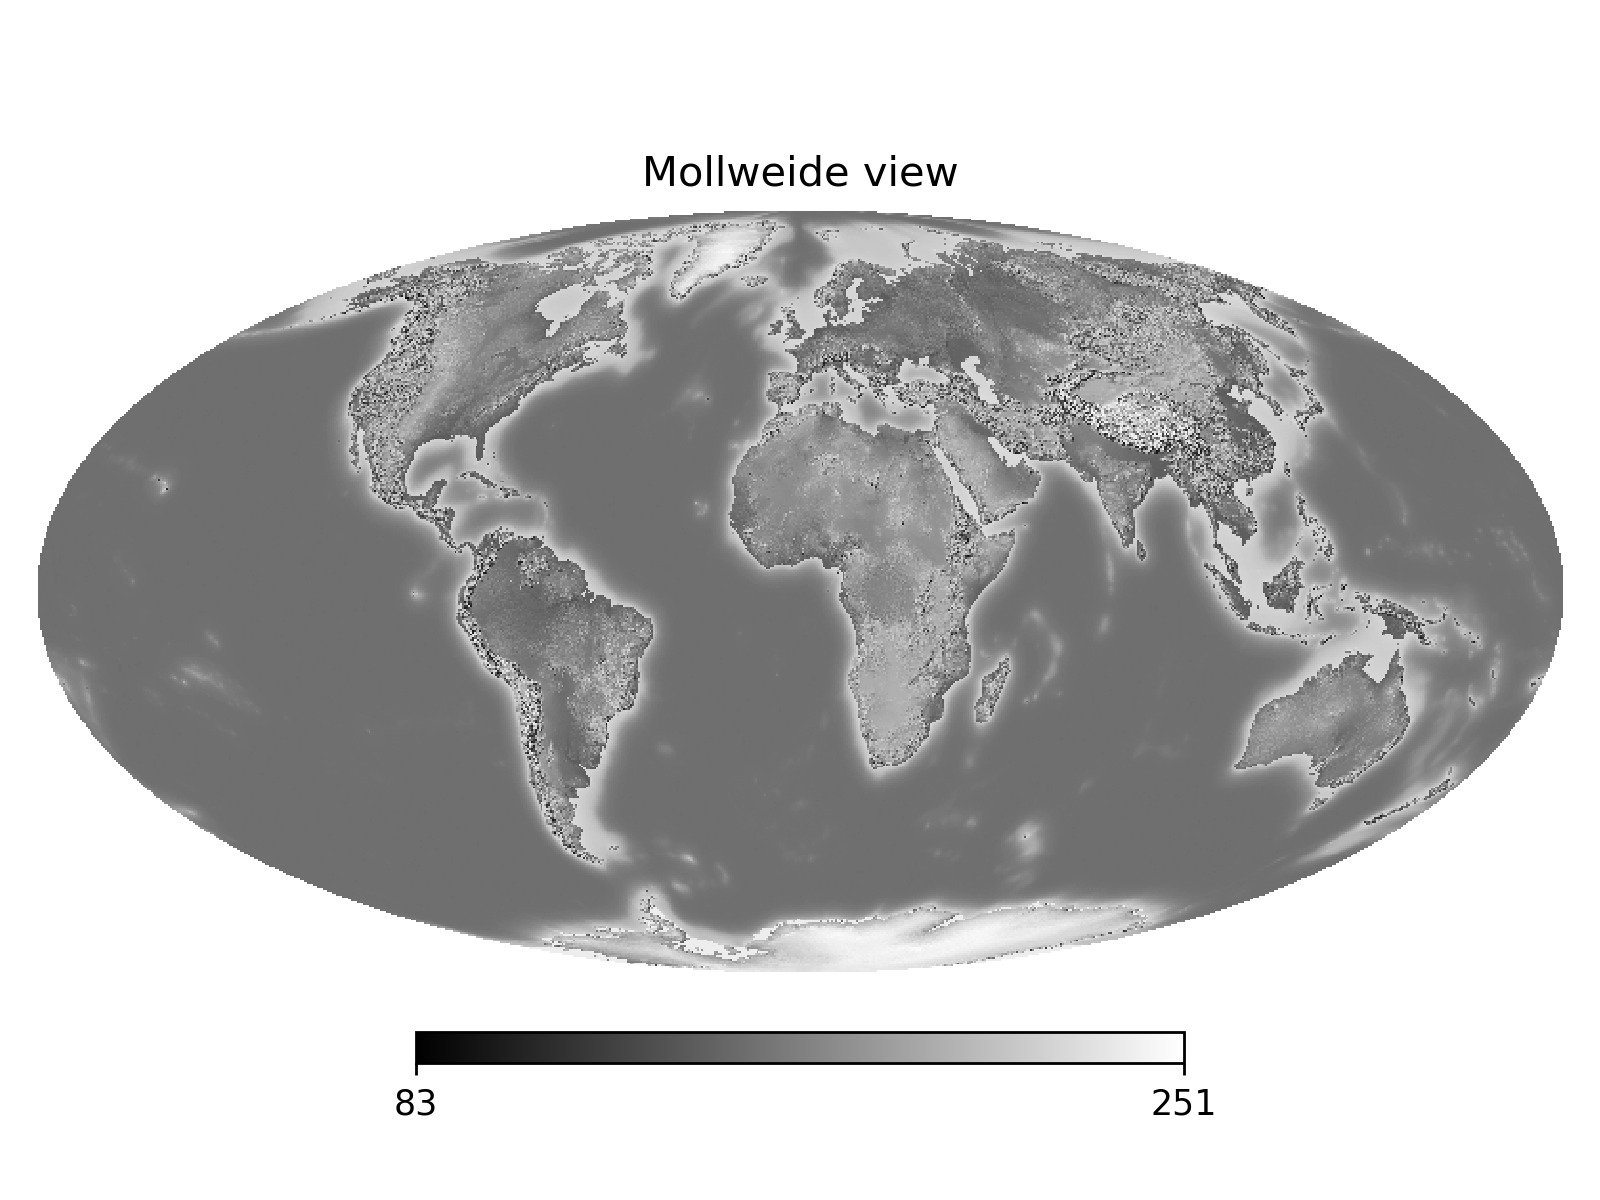

In [5]:
earth_hp = np.loadtxt('./earth_hp.txt')
cf = plt.figure()
hp.mollview(earth_hp, cmap="gray", flip='geo', fig=cf)

## Spherical harmonic transform
Now comes the fun part. We need to find the coefficients of our spherical harmonics. We will assume our image, $I(\theta,\phi)$ can be represented as a linear combination of spherical harmonics.
$$I(\theta,\phi) = \sum_{l=0}^{\infty}\sum_{m=-l}^{l}A_l^mY_l^m(\theta,\phi)$$
And we find the $A_l^m$ coefficients using Fourier's trick.
$$A_l^m=\int Y_l^{m*}(\theta,\phi)I(\theta,\phi)d\Omega$$

Lucky for us, `healpy` has built in functions that do this calculation for us, and they do it much faster than what I could program in a notebook.

[   0    1    2    3    4    5    6    7    8    9   11   12   14   16
   18   21   24   28   32   37   42   49   56   64   74   84   97  111
  128  147  169  194  223  256  294  338  388  446  512  588  676  776
  891 1000]


<IPython.core.display.Javascript object>


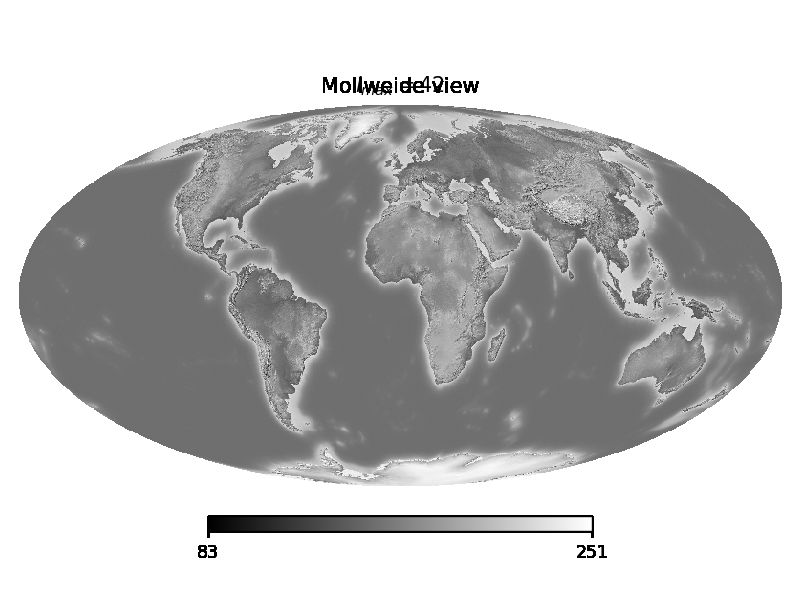

In [86]:
# Do the calculations here so we can quickly animate
lmaxmax = 1000  # very largest l to get to
lmax_list = np.round(2**np.arange(0, np.log2(lmaxmax), .2)).astype(int)
lmax_list = np.append(lmax_list, [lmaxmax, 0])
lmax_list = np.unique(lmax_list)
print(lmax_list)

cf = plt.figure()

maps = []
for lmax in lmax_list:
    alm = hp.map2alm(earth_hp, lmax=lmax)
    earth0 = hp.alm2map(alm, nside)
    maps.append(hp.mollview(earth0, fig=cf, flip='geo', cmap='gray', min=83, max=251, return_projected_map=True))

<IPython.core.display.Javascript object>


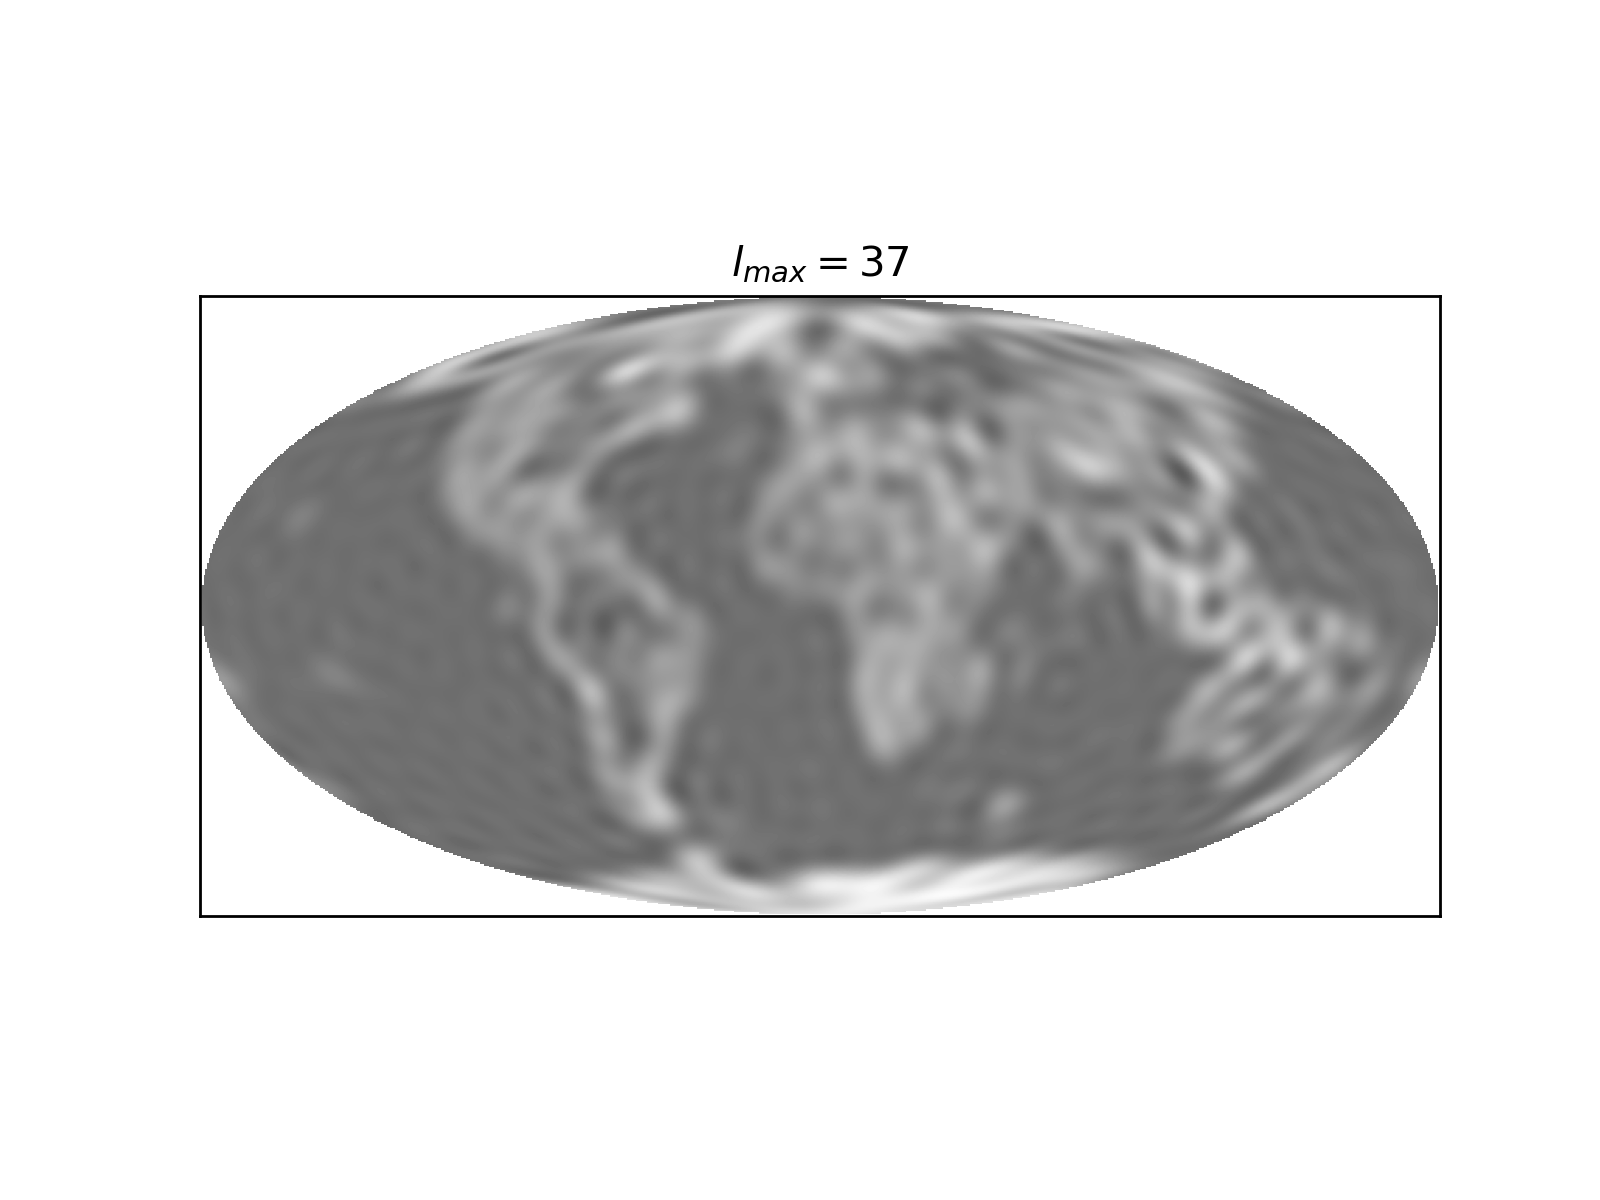

In [99]:
# now animate
fig = plt.figure()

im = plt.imshow(maps[0], cmap='gray', vmin=83, vmax=251, origin='lower')
plt.title(r'$l_{max}=0$')
plt.xticks([])
plt.yticks([])

def init():
    im.set_data(maps[0])

def animate(i):
    im.set_data(maps[i])
    plt.title(r'$l_{max}=$'+str(lmax_list[i]))

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(maps), interval=500, blit=True)

Now we may want to know "how much" of the earth's geography is contained in which spherical harmonic modes. To answer there, we can look at the power spectrum, $C_l$. Think of $C_l$ as being the average magnitude square of the $A_l^m$'s for a given $l$ (i.e., $C_l=\frac{1}{2l+1}\sum_{m=-l}^{l}A_l^m$). Again, `healpy` has tools for doing the calculation for us.

In [75]:
ps = hp.anafast(earth_hp)

<IPython.core.display.Javascript object>


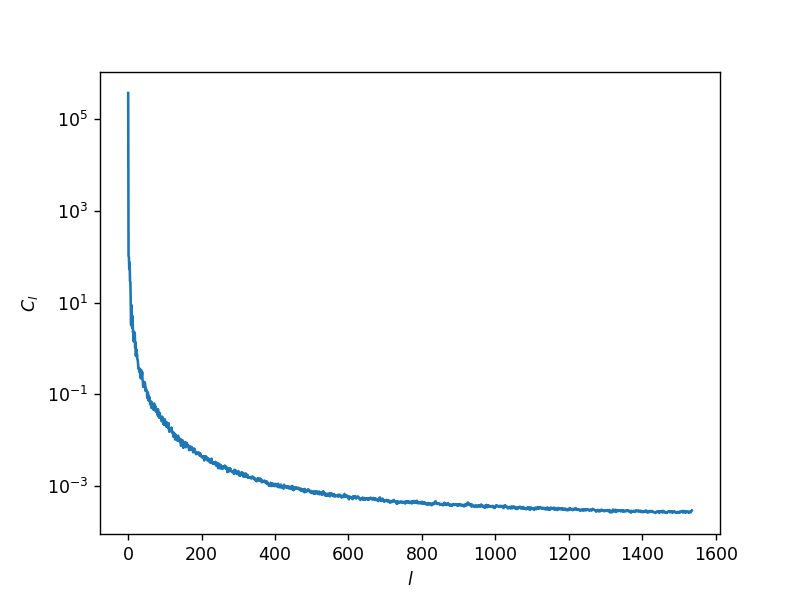

Text(0, 0.5, '$C_l$')

In [91]:
plt.figure()
plt.semilogy(ps)
plt.xlabel('$l$')
plt.ylabel('$C_l$')

Notice the logarithmic y-scale - most of the power is in low $l$s. This should seem right based on the animation above. Even though I skip many $l$'s as the animation goes on, the image doesn't change a bunch at large $l$. Most of the information is at low $l$. In fact, this is one way we can compress images to save storage space - perform a transformation, and only keep the significant modes.

Let's do a rough calculation to see how much we could compress our earth image. The raw image has $12\times512^2=3,145,728$ pixels. So think of that as $\sim3\times10^6$ pieces of information. I think the reconstructed image looks pretty darn good around $l_{max}=200$ or so. How many total pieces of information go into $l_{max}=200$? Each $l$ has $2l+1$ different $m$ modes. So the total is $\sum_{l=0}^{l_{max}}(2l+1)=(l_{max}+1)^2=40,401$. To be fair, each $A_l^m$ is complex, whereas the raw data was real. So we need to multiply by two: $N=80,802$.

This means our "compressed" data is only about 2.5% the size of our raw data! Granted, we lost some information along the way, but depending on the purpose of the image, this might be a very good trade off.